<h4 style="text-align: right">
*M. Isabel Gonzalez Rosas*
</h4>
***

<h1 style="text-align: center"> Project 3: Investigate a Dataset - TMDB Movie Data</h1>

## Table of Contents
<ul>
    <li> 
        <a href="#intro">Introduction</a>
        <ul>
            <li><a href="#questions">Possible Questions</a></li>
            <li><a href="#imports">Imports</a></li>
        </ul>
    </li>
    <li>
        <a href="#wrangling">Data Wrangling</a>
        <ul>
            <li><a href="#general_properties">General Properties</a></li>
            <li>
                <a href="#data_cleaning">Data Cleaning</a>
                <ul>
                    <li>
                        <a href="#checking_null">Checking for null values</a>
                        <ul>
                            <li><a href="#drop_director">Droping Director</a></li>
                            <li><a href="#drop_cast">Droping Cast</a></li>
                            <li><a href="#drop_genre">Droping Genre</a></li>
                        </ul>
                    </li>
                    <li><a href="#checking_duplicates">Checking for duplicates</a></li>
                    <li>
                        <a href="#checking_data_types">Checking DataTypes</a>
                        <ul>
                            <li><a href="#data_types_pipes">Pipe separated string values to list</a></li>
                            <li><a href="#data_types_datetime">Release_date to datetime type</a></li>
                        </ul>
                    </li>               
                </ul>
            </li>
        </ul>
    </li>
    <li>
        <a href="#eda">Exploratory Data Analysis</a>
        <ol>
            <li>
                <a href="#q1">What's the relationship between popularity and vote_count, vote_average and revenue?</a>
                <ul>
                    <li><a href="#pop_v_count">Popularity vs. vote_count?</a></li>
                    <li><a href="#pop_v_average">Popularity vs. vote_average?</a></li>
                    <li><a href="#pop_revenue">Popularity vs. revenue?</a></li>
                    <li><a href="#q1_conclusion">Conclusion</a></li>
                </ul>
            </li>
            <li><a href="#q2">What genre produces more revenue in average?</a></li>
            <li><a href="#q3">Which genres are most popular from year to year? </a></li>
            <li><a href="#q4">Which year produced more revenue?</a></li>
            <li><a href="#q5">What's the average revenue per genre per year?</a></li>
            <li><a href="#q6">Budget statistics</a></li>
            
        </ol>
    </li>
    <li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction


The chosen dataset for this project is [TMDb movie data](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv "TMDb movie data").
<p>This data set contains information about about 10866 movies. </p>
<p>There are 21 columns with different information about each movie such as id, [imdb_id](https://www.imdb.com/ IMDB), original title, budget, revenue, release year, etc.</p>
<a id='questions'></a>
### Possible questions
1. What's the relationship between *popularity and vote_count, vote_average and revenue?
1. What genre produces more revenue in average?
1. Which genres are most popular from year to year? 
1. Which year produced more revenue?
1. What's the average revenue per genre per year?
1. Budget statistics.

> *Popularity is cumulative decided by number of star ratings. [source](https://www.kaggle.com/tmdb/tmdb-movie-metadata/discussion/50548)


<a id='imports'></a>
### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.patches as mpatches #https://matplotlib.org/users/legend_guide.html

<a id='wrangling'></a>
## Data Wrangling

<a id='general_properties'></a>
### General Properties

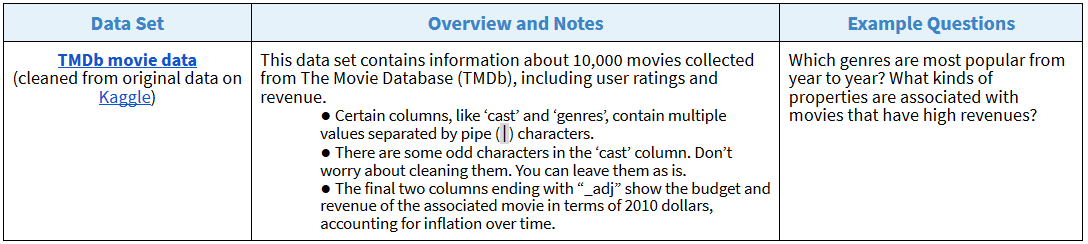

In [2]:
#Loading csv into DataFrame 
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
print("df rows: {}.\ndf columns: {}.".format(df.shape[0], df.shape[1]))

df rows: 10866.
df columns: 21.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

<a id='data_cleaning'></a>
### Data Cleaning

<a id='checking_null'></a>
#### Checking for null values

In [5]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

<p>As shown in the previous cell, `imdb_id`, `cast`, `homepage`, `director`, `tagline`, `keywords`, `overview`, `genres` and `production_companies` have null values. However, the only fields that affect any of the proposed questions are `director` , `genres` and `cast`. Hence I'll just drop rows with null values for those columns and won't use `df.dropna()` method. </p>
<p>As `homepage` field has 7930 NaN values, using `drop_na()` will cause a major loss of significant data.

In [6]:
def drop_rows(df_temp, df):
    """
    Removes specific rows from a dataframe and returns it.

    Args:
        (DataFrame) df_temp - DataFrame with data that needs to be removed
        (DataFrame) df - DataFrame to be transformed
    Returns:
        Dataframe with removed rows. 
    """
    index_array = np.array(df_temp.index) #array of indexes for rows with NaN/duplicated values
    for row in index_array:
        df = df.drop(row)
    return df

<a id='drop_director'></a>
* **Droping Director**

In [7]:
# DataFrame with movies with NaN director
df_null_director = df[df['director'].isnull()]

print("Rows in df before droping ones with NaN value for director: {}.".format(df.shape[0]))
df = drop_rows(df_null_director, df)
print("Rows in df after droping ones with NaN value for director: {}.".format(df.shape[0]))
print("Is there still any NaN director? - {}.".format(df['director'].isnull().any()))

Rows in df before droping ones with NaN value for director: 10866.
Rows in df after droping ones with NaN value for director: 10822.
Is there still any NaN director? - False.


I created a dataframe containing rows where director is null. Inside `drop_rows` method, I iterate over those rows and drop them from original df. 
<p> The same methods are used to drop NaN values in cast and genre. 

<a id='drop_cast'></a>
* **Droping Cast**

In [8]:
# DataFrame with movies with NaN cast
df_null_cast = df[df['cast'].isnull()]
print("Rows in df before droping ones with NaN value for cast: {}.".format(df.shape[0]))
df = drop_rows(df_null_cast, df)
print("Rows in df after droping ones with NaN value for cast: {}.".format(df.shape[0]))
print("Is there still any NaN cast? - {}.".format(df['cast'].isnull().any()))

Rows in df before droping ones with NaN value for cast: 10822.
Rows in df after droping ones with NaN value for cast: 10752.
Is there still any NaN cast? - False.


<a id='drop_genre'></a>
* **Droping Genre**

In [9]:
# DataFrame with movies with NaN genres
df_null_genres = df[df['genres'].isnull()]
print("Rows in df before droping ones with NaN value for genres: {}.".format(df.shape[0]))
df = drop_rows(df_null_genres, df)
print("Rows in df after droping ones with NaN value for genres: {}.".format(df.shape[0]))
print("Is there still any NaN genres? - {}.".format(df['genres'].isnull().any()))

Rows in df before droping ones with NaN value for genres: 10752.
Rows in df after droping ones with NaN value for genres: 10732.
Is there still any NaN genres? - False.


<a id='checking_duplicates'></a>
#### Checking for duplicates

In [10]:
df['id'].duplicated().sum()

1

In [11]:
print("Rows in df before droping duplicates: {}.".format(df.shape[0]))
df.drop_duplicates(inplace=True)
print("Rows in df after droping duplicates: {}.".format(df.shape[0]))

Rows in df before droping duplicates: 10732.
Rows in df after droping duplicates: 10731.


As there is one duplicated id I droped it. 

<a id='checking_data_types'></a>
#### Checking DataTypes

<a id='data_types_pipes'></a>
* **Pipe separated string values to list**

In [12]:
df.iloc[0]

id                                                                 135397
imdb_id                                                         tt0369610
popularity                                                        32.9858
budget                                                          150000000
revenue                                                        1513528810
original_title                                             Jurassic World
cast                    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
homepage                                    http://www.jurassicworld.com/
director                                                  Colin Trevorrow
tagline                                                 The park is open.
keywords                monster|dna|tyrannosaurus rex|velociraptor|island
overview                Twenty-two years after the events of Jurassic ...
runtime                                                               124
genres                          Action

---
By checking the information above it can be seen that some columns, such as: 
* cast, 
* keywords, 
* genres, 
* production_companies and
* director

<p>contain more than one value separated by a pipe (|). </p>
<p>Such information is saved as string ("Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson") making it difficult to analyse the separate values contained in that field. That's why I consider best to save that values in a list of strings so the different values can be accessed easily. </p> 
<p>For example `df.iloc[0]['cast'][0]` for 'Chris Pratt'. </p>
<p>The function below helps solving this. </p>

---

In [13]:
def split_pipes(part):
    """
    Takes string input and splits it by the pipe | symbol.

    Args:
        (str) part - string value from series
    Returns:
        Python list of string values from input field. 
    """
    part = str(part)
    return part.split('|')

In [14]:
df['cast'] = df['cast'].apply(split_pipes)
df['keywords'] = df['keywords'].apply(split_pipes)
df['genres'] = df['genres'].apply(split_pipes)
df['production_companies'] = df['production_companies'].apply(split_pipes)
df['director'] = df['director'].apply(split_pipes)

In [15]:
df[['cast','keywords','genres','production_companies', 'director']].head()

,cast,keywords,genres,production_companies,director
0,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...","[monster, dna, tyrannosaurus rex, velociraptor...","[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",[Colin Trevorrow]
1,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...","[future, chase, post-apocalyptic, dystopia, au...","[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",[George Miller]
2,"[Shailene Woodley, Theo James, Kate Winslet, A...","[based on novel, revolution, dystopia, sequel,...","[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",[Robert Schwentke]
3,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...","[android, spaceship, jedi, space opera, 3d]","[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",[J.J. Abrams]
4,"[Vin Diesel, Paul Walker, Jason Statham, Miche...","[car race, speed, revenge, suspense, car]","[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",[James Wan]


It can be seen that all strings separated by | are now lists of strings. 

<a id='data_types_datetime'></a>
* **Release_date  to datetime type**

In [16]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 21 columns):
id                      10731 non-null int64
imdb_id                 10726 non-null object
popularity              10731 non-null float64
budget                  10731 non-null int64
revenue                 10731 non-null int64
original_title          10731 non-null object
cast                    10731 non-null object
homepage                2893 non-null object
director                10731 non-null object
tagline                 8001 non-null object
keywords                10731 non-null object
overview                10729 non-null object
runtime                 10731 non-null int64
genres                  10731 non-null object
production_companies    10731 non-null object
release_date            10731 non-null datetime64[ns]
vote_count              10731 non-null int64
vote_average            10731 non-null float64
release_year            10731 non-null int64
budget_adj     

`released_date` was saved as string. I converted it to datetime in case it's needed later to manipulate field as date.

<a id='eda'></a>
## Exploratory Data Analysis

<a id='q1'></a>
### Research Question 1- What's the relationship between `popularity` and `vote_count`?

<a id='pop_v_count'></a>
*  **`Popularity` vs. `vote_count`**

In [18]:
df['popularity'].describe()

count    10731.000000
mean         0.652615
std          1.004804
min          0.000188
25%          0.210765
50%          0.387081
75%          0.720889
max         32.985763
Name: popularity, dtype: float64

In [19]:
df['vote_count'].describe()

count    10731.000000
mean       219.812972
std        578.815324
min         10.000000
25%         17.000000
50%         39.000000
75%        148.000000
max       9767.000000
Name: vote_count, dtype: float64

In [20]:
#https://stackoverflow.com/questions/41635448/how-can-i-draw-scatter-trend-line-on-matplot-python-pandas?noredirect=1&lq=1
def draw_scatter_with_trend_line(x, y, title, xLabel, yLabel):
    """
    Draws a scatter plot with trend lines

    Args:
        (DataFrame column) x - DataFrame column for x axis
        (DataFrame columns) y - DataFrame column for y axis
        (str) - Plot title
        (str) - Label for x axis
        (str) - Label for y axis
    """
    plt.figure(figsize=(15,10))
    plt.scatter(x, y)
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.title(title, fontsize=18)
    plt.xlabel(xLabel, fontsize=14)
    plt.ylabel(yLabel, fontsize=14)    
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.plot(x,p(x),"b-");

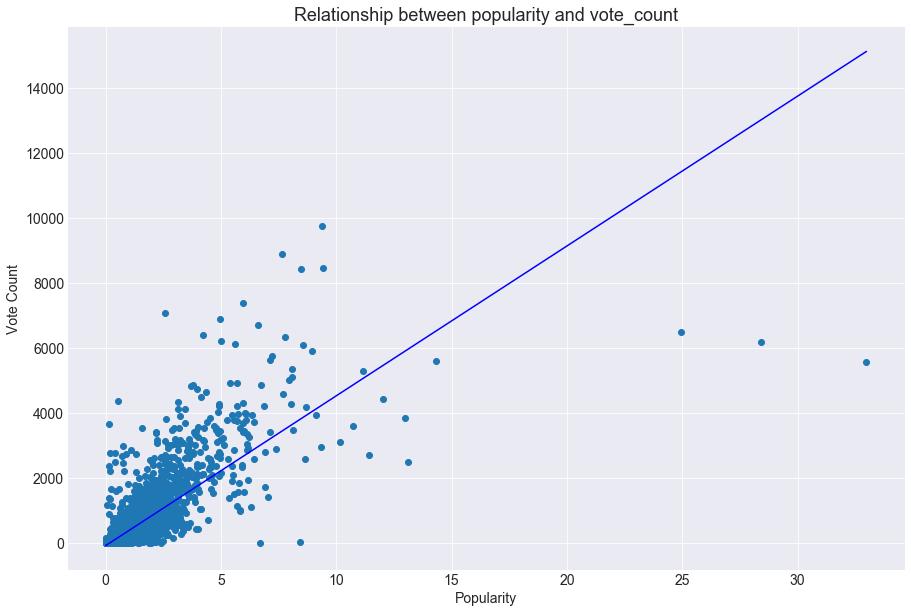

In [21]:
draw_scatter_with_trend_line(df['popularity'], df['vote_count'], 'Relationship between popularity and vote_count', 'Popularity', 'Vote Count')

The above graph shows that there is a **strong positive** relationship between popularity of a movie and the number of users who vote.

In [22]:
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html
df[['popularity', 'vote_count']].corr(method='pearson')['popularity'].vote_count

0.8006187445347125

Taking into account Pearson's r it can be seen that the correlation coefficient is 0.8006187445347125, prety near to 1, confirming a strong and positive relationship between this two variables. 
<p> It can be the case that as the popularity increases, more people see the movie and want to rate it.

<a id='pop_v_average'></a>
* **`Popularity` vs. `vote_average`**

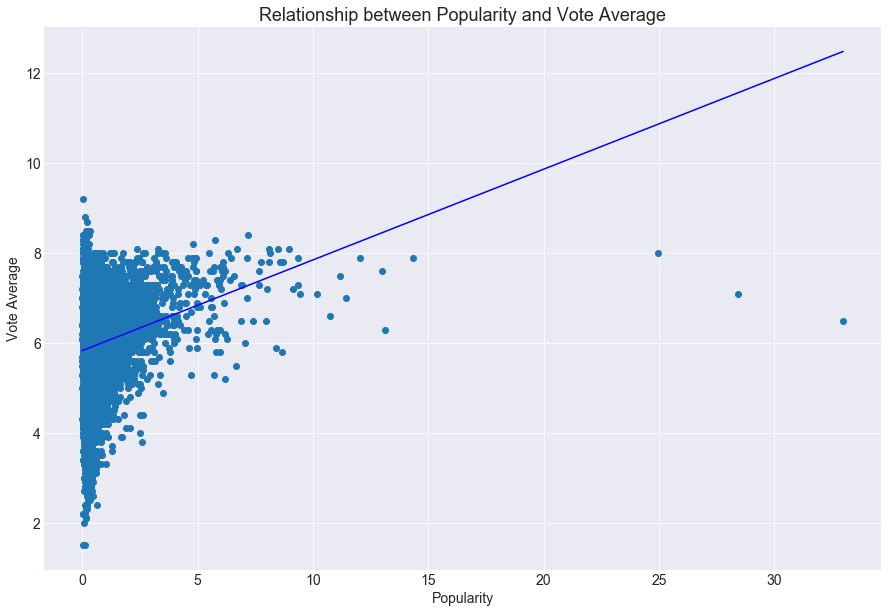

In [23]:
draw_scatter_with_trend_line(df['popularity'], df['vote_average'],"Relationship between Popularity and Vote Average", "Popularity", 'Vote Average')

In [24]:
df[['popularity', 'vote_average']].corr(method='pearson')['popularity'].vote_average

0.2179063121675616

In this case, the relationship has a correlaction coafficient of 0.2179063121675616 showing that, although there is a positive correlation between popularity and vote average, the **relationship is weak**. 
<p> This could be caused by the fact that a movie may be popular due to a lot of advertising but may not be so good.

<a id='pop_revenue'></a>
* **`Popularity` vs. `revenue_adj`**

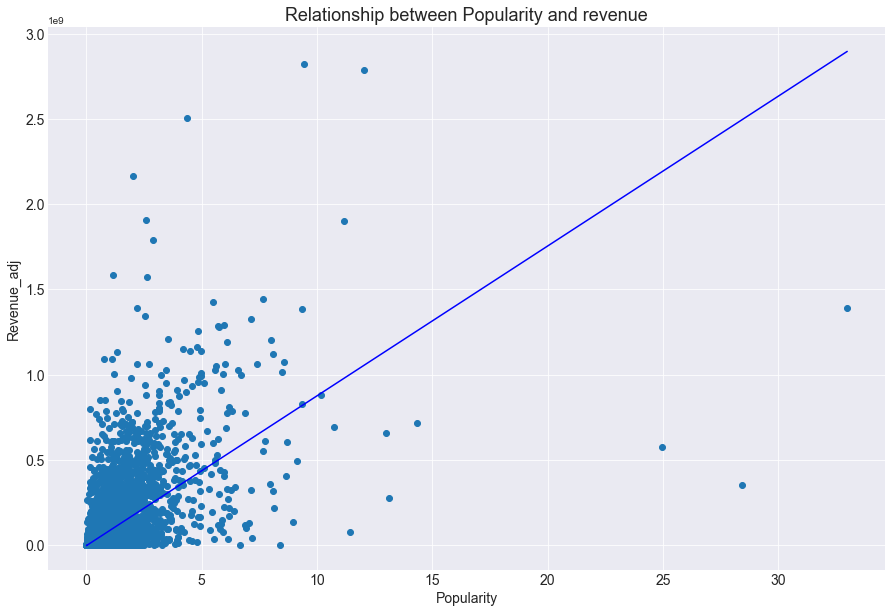

In [25]:
draw_scatter_with_trend_line(df['popularity'], df['revenue_adj'],"Relationship between Popularity and revenue", "Popularity", 'Revenue_adj')

In [26]:
df[['popularity', 'revenue_adj']].corr(method='pearson')['popularity'].revenue_adj

0.6083836708004083

Both from the plot and from the correlation coefficient of 0.6083836708004083 it can be seen that there is a **positive and moderate** relationship between these two variables. 
<p> It appears that as more popular is a movie, more revenue has. 
<p> I chose to use `revenue_adj` field instead of `revenue` one so I don't have to account for inflation while comparing revenue to popularity.  

<a id='q1_conclusion'></a>
* **Conclusion**

In conclusion, from the three variables compared to popularity, it can be seen that a movie that's watched by many people increases the number of people that vote, hence a higher `vote_count` value, and though the movie may or may not be good, if many peplo vote, `popularity`, which is the sum of raitings, raises. 
<p>However, if the movie it's not so good, `vote_average` won't always be high besides movie being popular. This means that a movie being popular doesn't mean the movie will be good, hence the relationship between this two variables is weak.
<p>Finally, if popularity is high, it usually means that many people watched the movie so this means that `revenue_adj` is greater. 

<a id='q2'></a>
### Research Question 2- What genre produces more renevue in average?

To be able to answer this question I need to group by genre. As genres column consists of list values, this needs to be corrected. 
<p> For this question I will split genres into multiple rows for each movie. This is going to be done just for this question and not modifing `df` since the duplicated values on other columns may affect other questions' results. 
<p> I tried doing my own function but it took considerable time and I actually never saw it finished so I searched for a function already written and modified it to fit my df.

In [27]:
#https://gist.github.com/jlln/338b4b0b55bd6984f883
def splitDataFrameList(df,target_column):
    """
    Draws a scatter plot with trend lines

    Args:
        (DataFrame) - DataFrame to split
        (DataFrame columns) - the column containing the list values to split        
    Returns:
        (DataFrame) - a dataframe with each entry for the target column separated, with each element moved into a new row. 
                    The values in the other columns are duplicated across the newly divided rows.
    """
    def splitListToRows(row,row_accumulator,target_column):
        split_row = row[target_column]
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column))
    new_df = pd.DataFrame(new_rows)
    return new_df

In [28]:
df_genres = splitDataFrameList(df,'genres')
df_genres.head(2)

,budget,budget_adj,cast,director,genres,homepage,id,imdb_id,keywords,original_title,...,popularity,production_companies,release_date,release_year,revenue,revenue_adj,runtime,tagline,vote_average,vote_count
0,150000000,1.379999e+08,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],Action,http://www.jurassicworld.com/,135397,tt0369610,"[monster, dna, tyrannosaurus rex, velociraptor...",Jurassic World,...,32.985763,"[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,2015,1513528810,1.392446e+09,124,The park is open.,6.5,5562
1,150000000,1.379999e+08,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],Adventure,http://www.jurassicworld.com/,135397,tt0369610,"[monster, dna, tyrannosaurus rex, velociraptor...",Jurassic World,...,32.985763,"[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,2015,1513528810,1.392446e+09,124,The park is open.,6.5,5562


Just from the two rows above it can be seen that data has been duplicated and genres have been divided into different rows. 

In [29]:
mean_rev_per_genre = df_genres.groupby('genres')['revenue_adj'].mean()
mean_rev_per_genre

genres
Action             9.206722e+07
Adventure          1.422555e+08
Animation          8.975005e+07
Comedy             4.812243e+07
Crime              5.667827e+07
Documentary        2.425647e+06
Drama              4.053378e+07
Family             8.896531e+07
Fantasy            1.122142e+08
Foreign            1.762528e+06
History            4.852978e+07
Horror             2.409743e+07
Music              4.770555e+07
Mystery            5.101526e+07
Romance            4.830658e+07
Science Fiction    8.754830e+07
TV Movie           3.604266e+05
Thriller           5.538135e+07
War                7.050840e+07
Western            4.638237e+07
Name: revenue_adj, dtype: float64

In [30]:
max_revenue = mean_rev_per_genre.max()
max_revenue

142255467.8765137

In [31]:
#https://preinventedwheel.com/easy-matplotlib-bar-chart/
mean_rev_per_genre_sorted = mean_rev_per_genre.sort_values(ascending=False)

In [32]:
def draw_bar_plot(data, title, xLabel, yLabel, fig=(15,10)): 
    """
    Draws a bar plot

    Args:
        (Series) - Series with data     
        (str) - Plot title
        (str) - Label for x axis
        (str) - Label for y axis
    """
    locations = range(len(data.index))
    plt.figure(figsize=fig)
    plt.xticks(rotation=90, fontsize=14)
    plt.yticks(fontsize=14)
    plt.title(title, fontsize='18')
    plt.xlabel(xLabel, fontsize=14)
    plt.ylabel(yLabel, fontsize=14)
    plt.bar(locations,data, tick_label=data.index);

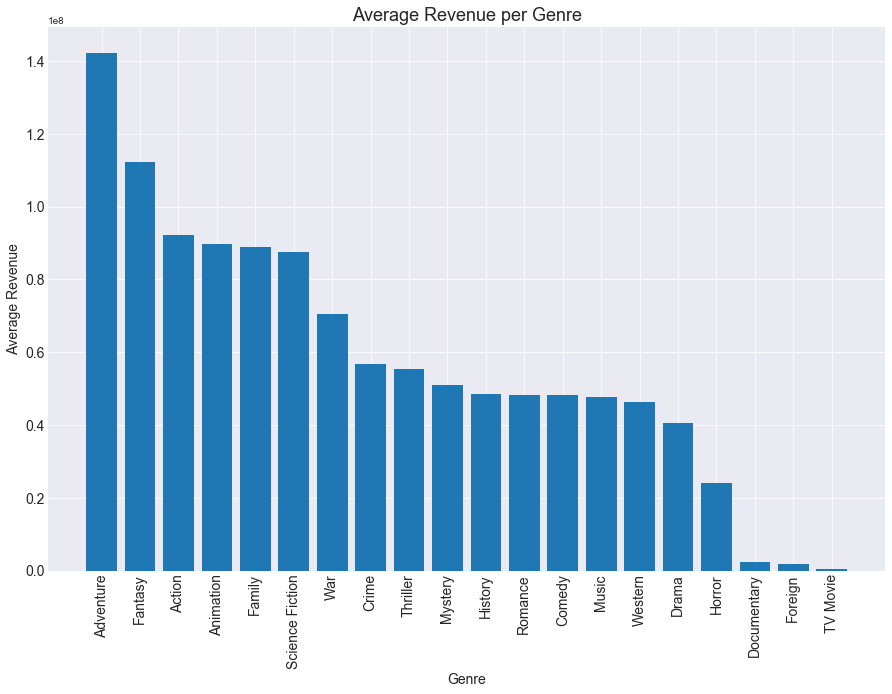

In [33]:
draw_bar_plot(mean_rev_per_genre_sorted, 'Average Revenue per Genre', 'Genre', 'Average Revenue')

It can easily be seen from the plot that Adventure genre is the one with max average revenue - with 142255467.8765137 USD (2010). 

<a id='q3'></a>
### Research Question 3- Which genres are most popular from year to year? 

In [34]:
#calculate mean popularity for genre per year
genre_popularity_by_year = pd.DataFrame(df_genres.groupby(['release_year', 'genres'], as_index=False)['popularity'].mean())
genre_popularity_by_year.rename(columns={'popularity':'mean_popularity'}, inplace=True)
#genre_popularity_by_year.head(14)

In [35]:
#get the max popularity for each year
max_mean_pop_per_year = genre_popularity_by_year.groupby(['release_year'], as_index=False)['mean_popularity'].max()
max_mean_pop_per_year.rename(columns={'mean_popularity':'mean_popularity_max'}, inplace=True)
#max_mean_pop_per_year.head()

In [36]:
#merge genre_popularity_by_year with max_mean_pop_per_year to get the genre for each max
most_popular_genre_per_year = max_mean_pop_per_year.merge(genre_popularity_by_year, how='left',left_on=max_mean_pop_per_year['mean_popularity_max'], right_on=genre_popularity_by_year['mean_popularity'])
most_popular_genre_per_year.drop(['key_0','release_year_y',  'mean_popularity'], axis=1, inplace=True)
most_popular_genre_per_year.rename(columns={'release_year_x':'release_year'}, inplace=True)
most_popular_genre_per_year

,release_year,mean_popularity_max,genres
0,1960,0.811910,Thriller
1,1961,2.631987,Animation
2,1962,0.942513,Adventure
3,1963,2.180410,Animation
4,1964,0.930959,War
5,1965,0.968850,Music
6,1966,0.585717,Animation
7,1967,2.550704,Animation
8,1968,1.519456,Mystery
9,1969,0.948020,Crime


The above information shows the most popular genre per year and it's popularity value.
<p>For achieving this result it was necessary to:</p>
1. Calculate the mean popularity for each genre per year
1. Calculate the max popularity for each year
1. Merge both information to get no only the max popularity for each year but to which genre it belonged. 

<p>Let's check the information on a bar chart. 

In [37]:
#https://jaxenter.com/implement-switch-case-statement-python-138315.html
def switch_color(genre):
    """
    Returns a hex color code for a genre

    Args:
        (str) - genre to switch from
    Returns:
        A string with hex value for the passed genre
    """
    switcher = {
        'Thriller': "#2e8b57",
        'Animation': "#adf7c2",
        'Adventure': "#ff1a72",
        'War': "#3933c9",
        'Music': "#fa959f",
        'Mystery': "#5a80b4",
        'Crime': "#40e0d0",
        'Family': "#088da5",
        'Fantasy': "#718da5",
        'Action': "#f6546a",
        'Science Fiction': "#2c4b25",
        'History': "#ffe638",
        'Western': "#ffd5f9",
        'Comedy': "#899982",
        'Drama': "#00ffff",
        'Foreign': "#bf00ff",
        'Horror': "#ff0000",
        'Romance': "#ff00ff",
        'TV Movie': "#ff8000",
        'Documentary': "#cc6666"
    }
    return switcher.get(genre)

In [38]:
def get_colors(ls_genres):
    """
    Returns list of hex color codes

    Args:
        (np.array) - array of genres
    Returns:
        A list of hex color values. 
    """
    colors = []    
    for i in range(len(ls_genres)):
        color = switch_color(ls_genres[i])       
        colors.append(color)
            
    return colors  

In [39]:
def create_patches(ls_genres):
    """
    Returns list of patches

    Args:
        (np.array) - array of genres
    Returns:
        A list of patches. 
    """
    #https://matplotlib.org/users/legend_guide.html
    patches = []    
    for genre in ls_genres:
        patch = mpatches.Patch(color=switch_color(genre), label=genre)
        patches.append(patch)
        
    return patches

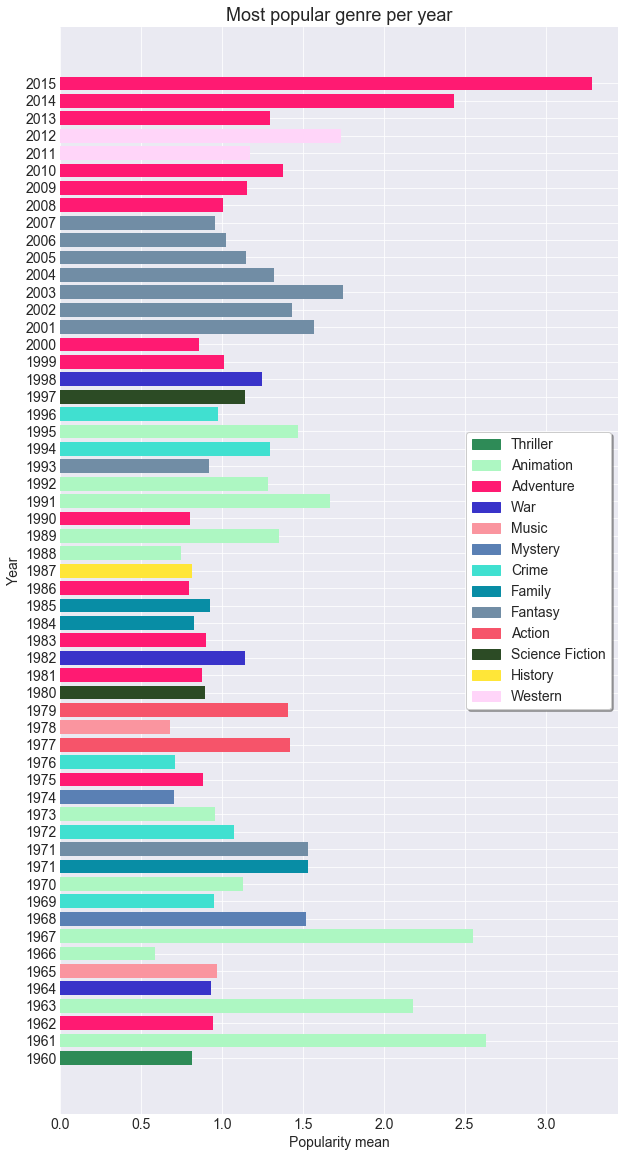

In [40]:
locations = np.array(range(len(most_popular_genre_per_year['release_year'])))
heights = np.array(most_popular_genre_per_year['mean_popularity_max'])
labels = np.array(most_popular_genre_per_year['release_year'])
genres = np.array(most_popular_genre_per_year['genres'])
colors = get_colors(genres)

plt.figure(figsize=(10,20))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Most popular genre per year', fontsize='18')
plt.xlabel('Popularity mean', fontsize=14)
plt.ylabel('Year', fontsize=14)

#https://matplotlib.org/users/legend_guide.html
legend = plt.legend(handles= create_patches(np.array(most_popular_genre_per_year['genres'].unique())), fontsize=14, shadow=True, facecolor='w', framealpha=1, frameon=True)
#https://stackoverflow.com/questions/30729473/seaborn-legend-with-background-color
#frame_on=True for the frame to be seen using sns

plt.barh(locations, heights, tick_label=labels, color=colors);

The above plot shows in a more graphic way the information from `most_popular_genre_per_year` dataframe. 

<a id='q4'></a>
### Research Question 4- Which year produced more revenue?

In [41]:
sorted_rev_per_year = df.groupby('release_year')['revenue_adj'].sum()
sorted_rev_per_year.sort_values(ascending=False, inplace=True)
sorted_rev_per_year.head()

release_year
2015    2.462144e+10
2012    2.339698e+10
2013    2.312342e+10
2011    2.297046e+10
2009    2.254393e+10
Name: revenue_adj, dtype: float64

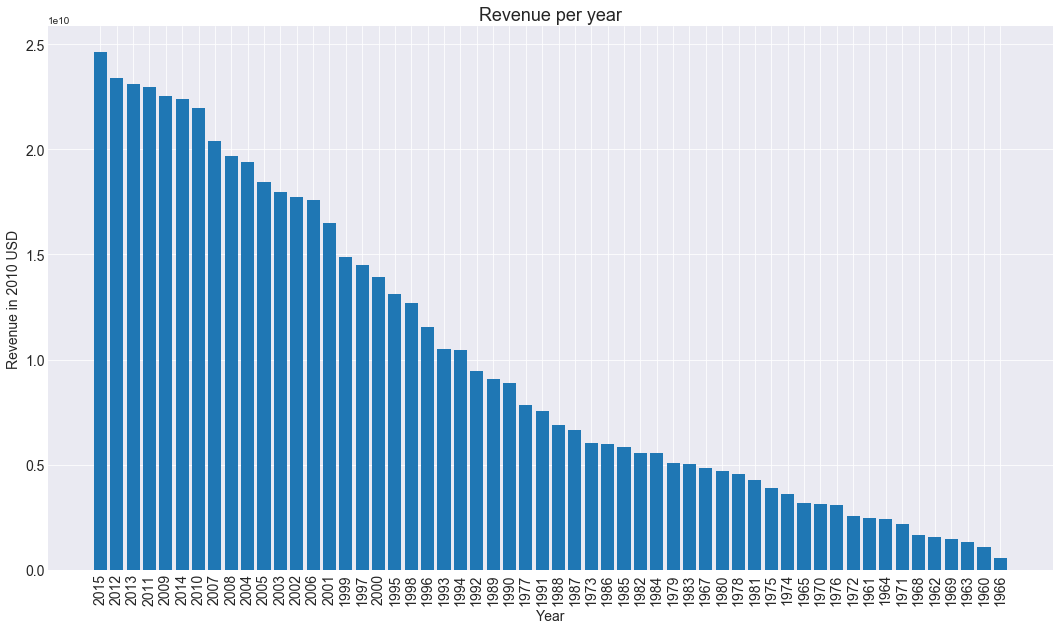

In [42]:
draw_bar_plot(sorted_rev_per_year, 'Revenue per year', 'Year', 'Revenue in 2010 USD', (18,10))

In [43]:
sorted_rev_per_year.max()

24621443643.124752

It can be seen both from `sorted_rev_per_year` and from the plot that 2015 was the year that produces more revenue, with 24621443643.124752 USD(2010).

<a id='q5'></a>
### Research Question 5- What's the average revenue per genre per year?

In [44]:
#calculate mean revenue for genre per year
mean_rev_per_year_genre = pd.DataFrame(df_genres.groupby(['release_year', 'genres'], as_index=False)['revenue_adj'].mean())
mean_rev_per_year_genre.rename(columns={'revenue_adj':'mean_revenue_adj'}, inplace=True)
mean_rev_per_year_genre.head(20)

,release_year,genres,mean_revenue_adj
0,1960,Action,5.981781e+07
1,1960,Adventure,7.232881e+06
2,1960,Comedy,4.432997e+07
3,1960,Crime,0.000000e+00
4,1960,Drama,6.975962e+07
5,1960,Family,2.457656e+07
6,1960,Fantasy,0.000000e+00
7,1960,Foreign,0.000000e+00
8,1960,History,8.847561e+07
9,1960,Horror,3.370499e+07


The DataFrame above shows average revenue per genre per year.

<a id='q6'></a>
### Research Question 6- Budget statistics

In [45]:
df['budget'].describe()

count    1.073100e+04
mean     1.480365e+07
std      3.106456e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.600000e+07
max      4.250000e+08
Name: budget, dtype: float64

It seems there are several movies with budget 0. As this cannnot be a real data, I'm droping those results and having only movies with budget bigger than 0 on new DataFrame df_budget_clean.
Is over this new dataframe that the describe method will be applied. 

In [46]:
df_budget_clean = pd.DataFrame(df.query('budget > 0'))
stats = pd.DataFrame(df_budget_clean['budget'].describe())
stats

,budget
count,5.153000e+03
mean,3.082824e+07
std,3.893199e+07
min,1.000000e+00
25%,6.000000e+06
50%,1.750000e+07
75%,4.000000e+07
max,4.250000e+08


In [47]:
data = np.array(df_budget_clean['budget'])
data

array([150000000, 150000000, 110000000, ...,   5115000,    700000,
           19000], dtype=int64)

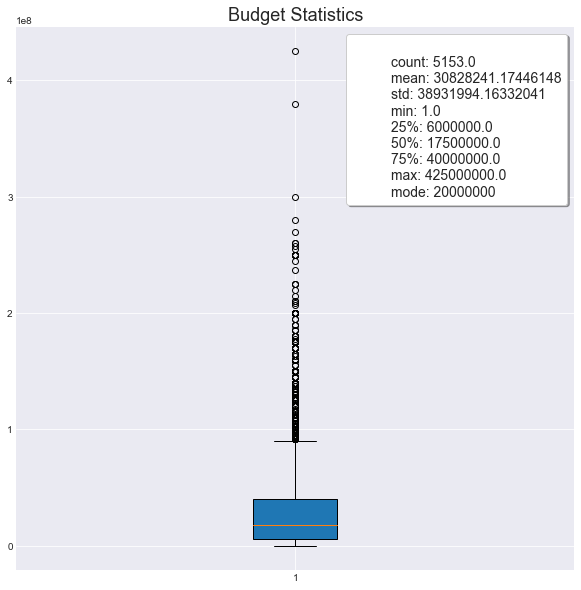

In [48]:
plt.figure(figsize = (10,10))

plt.title('Budget Statistics', fontsize='18');
legend_str = ""
for x,y in stats.iterrows():
    temp = "{}: {}".format(x,y[0])
    legend_str = legend_str + '\n' + temp
    
legend_str = legend_str + '\nmode: {}'.format(df_budget_clean['budget'].mode()[0])
    
patches= []
patch = mpatches.Patch(label=legend_str, color='white')
patches.append(patch)
legend = plt.legend(handles=patches, fontsize=14, shadow=True, facecolor='w', framealpha=1, frameon=True)



plt.boxplot(data, patch_artist=True); #patch_artist=True for colors

<a id='conclusions'></a>
## Conclusions

From the proposed questions it can be seen there is a positive correlation between popularity and vote_count, vote_average and revenue. 
<p>However, the correlation is not the same since the correlation between popularity and vote_count is strong, the correlation between popularity and vote_average is weak and the correlation between popularity and revenue_adj is moderate.
<p>Though no causation could be inferred, it's plausible to think that when a movie has high popularity is watched by many people, this may help to increase the revenue and to have more people voting. However, if the movie is not good, the vote average may not be either. 
<p>I learned that the genre that produces more revenue are adventure, fantasy, action, animation, family. 
<p> The fact that in the top 17 most popular genres are 8 Adventure and 7 Fantasy (also 2 music though music is the only two times that appears on the plot as most popular), supports the idea that popularity is correlated with revenue. 
<p> Summary statistics from budget can be found on last question and information about average revenue per genre per year on `mean_rev_per_year_genre`.